In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape

(150, 4)

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
df['cluster'] = kmeans.labels_
df['target'] = iris.target

iris_result = df.groupby(['target', 'cluster'])['sepal length (cm)'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


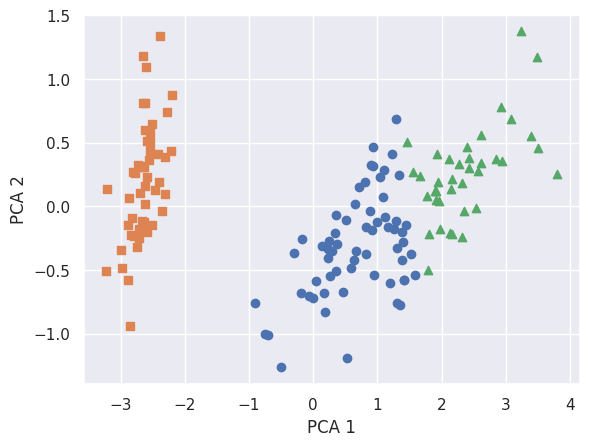

In [10]:
marker0_ind =df[df['cluster'] == 0].index
marker1_ind = df[df['cluster'] == 1].index
marker2_ind = df[df['cluster'] == 2].index

plt.scatter(x=df.loc[marker0_ind, 'pca_x'], y=df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1_ind, 'pca_x'], y=df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2_ind, 'pca_x'], y=df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(iris.data, df['cluster'])
print(score_samples.shape)

df['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, df['cluster'])
print(average_score)
df.head()

(150,)
0.5528190123564095


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,0.849302


In [12]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64